In [276]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the path to the new directory
new_directory = r'C:\Users\Carlos\Desktop\Master\Thesis'

# Change the current working directory to the new directory
os.chdir(new_directory)

# Verify the change by printing the current working directory
print(f"The new working directory is: {os.getcwd()}")


The new working directory is: C:\Users\Carlos\Desktop\Master\Thesis


# Numeric comparisons

In [277]:

# Define the path to your Excel file
numeric_comparison_file_path = "Papers_and_evidence_tables\Test_dataset\\numeric_comparison.xlsx"

# Read the Excel file into a DataFrame
df_numbers = pd.read_excel(numeric_comparison_file_path)

# Display the data
print(df_numbers)

                    study_name  accuracy_column_1  recall_column_1  \
0            Bashir_2018_table                100              100   
1           Bremmer_2018_table                100              100   
2            Djamin_2019_table                100              100   
3            Djamin_2020_table                100              100   
4             Faten_2014_table                 50               50   
5   Flores_Gonzalez_2015_table                100              100   
6              geng_2020_table                100              100   
7    Jaquet_Pilloud_2019_table                 50               50   
8            Raeisi_2019_table                100              100   
9             Risom_2020_table                100              100   
10     Ruangsomboon_2021_table                100              100   
11         Skjerven_2013_table                100              100   
12          Uysalol_2017_table                100              100   

    human_count_col

### Final reuslts

In [278]:

# Initialize a dictionary to store global accuracy and recall for each column
global_metrics = {}

# Loop over the column indices
for i in range(1, 9):  # Assuming you have columns indexed from 1 to 8
    tp_col = f"TP_column_{i}"
    gpt_count_col = f"gpt_count_column_{i}"
    human_count_col = f"human_count_column_{i}"

    # Check if these columns exist in the DataFrame
    if tp_col in df_numbers.columns and gpt_count_col in df_numbers.columns and human_count_col in df_numbers.columns:
        # Calculate global accuracy and recall
        global_accuracy = df_numbers[tp_col].sum() / df_numbers[gpt_count_col].sum() if df_numbers[gpt_count_col].sum() != 0 else 0
        global_recall = df_numbers[tp_col].sum() / df_numbers[human_count_col].sum() if df_numbers[human_count_col].sum() != 0 else 0
        
        # Store the results
        global_metrics[f"global_accuracy_column_{i}"] = global_accuracy * 100  # multiply by 100 to convert to percentage
        global_metrics[f"global_recall_column_{i}"] = global_recall * 100  # multiply by 100 to convert to percentage
    else:
        print(f"Columns related to index {i} are missing.")

# Optional: Save the global metrics to a DataFrame if you need to use or display them separately
df_global_metrics = pd.DataFrame([global_metrics])

# Print the results to see them
print(df_global_metrics)



   global_accuracy_column_1  global_recall_column_1  global_accuracy_column_2  \
0                 92.307692               92.307692                 65.217391   

   global_recall_column_2  global_accuracy_column_3  global_recall_column_3  \
0                   100.0                 20.516499                67.45283   

   global_accuracy_column_4  global_recall_column_4  global_accuracy_column_5  \
0                 72.093023               82.666667                 65.384615   

   global_recall_column_5  global_accuracy_column_6  global_recall_column_6  \
0                    68.0                 41.772152                 51.5625   

   global_accuracy_column_7  global_recall_column_7  global_accuracy_column_8  \
0                 30.996885               56.534091                 73.913043   

   global_recall_column_8  
0                    42.5  


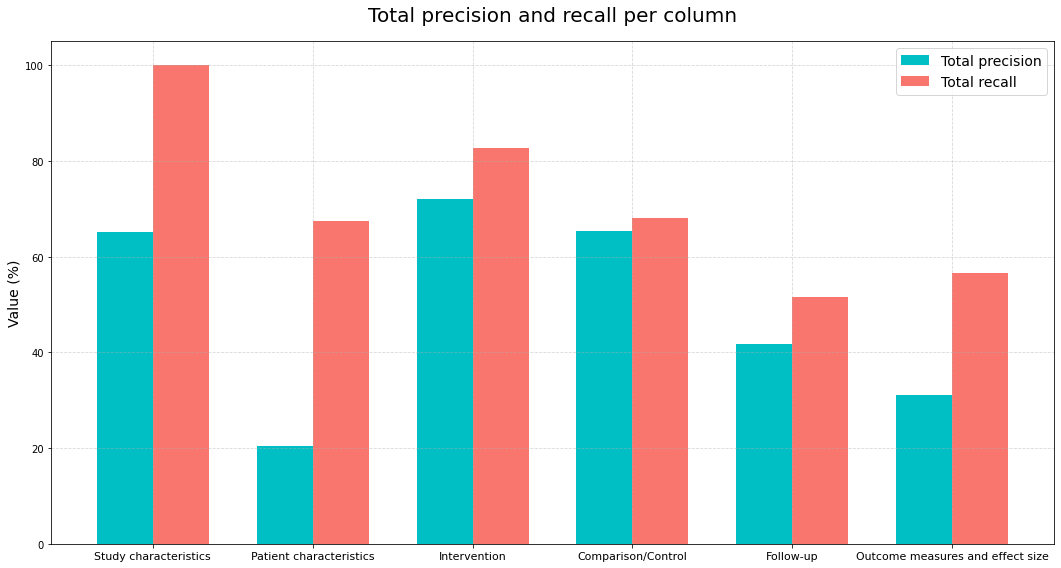

In [296]:
# Define the range of columns to plot
columns_range = range(2, 8)  # Columns 2 to 7

# Extract data for the plot
accuracies = [global_metrics.get(f"global_accuracy_column_{i}", 0) for i in columns_range]
recalls = [global_metrics.get(f"global_recall_column_{i}", 0) for i in columns_range]

# Set the positions of the bars
bar_width = 0.35  # Width of the bars
index = np.arange(len(columns_range))  # Consecutive integers

fig, ax = plt.subplots(figsize=(15, 8))

# Use a distinct and muted color palette, better for scientific publications
color_for_accuracy = '#00bfc4'  
color_for_recall = '#f8766d' 

bar1 = ax.bar(index - bar_width/2, accuracies, bar_width, label='Total precision', color=color_for_accuracy)
bar2 = ax.bar(index + bar_width/2, recalls, bar_width, label='Total recall', color=color_for_recall)

# Adding labels and title
ax.set_ylabel('Value (%)', fontsize=14)
ax.set_title('Total precision and recall per column', fontsize=20, pad = 20)
ax.set_xticks(index)

# Set custom names for each pair of bars
custom_names = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]
ax.set_xticklabels(custom_names, rotation=0, ha='center', fontsize=11)

ax.legend(fontsize = 14)

# Optional: add grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [280]:
# Initialize a dictionary to store the average counts and standard deviations
average_metrics = {}

# Loop over the column indices
for i in range(1, 9):  # Assuming you have columns indexed from 1 to 8
    human_count_col = f'human_count_column_{i}'
    gpt_count_col = f'gpt_count_column_{i}'

    # Check if these columns exist in the DataFrame
    if human_count_col in df_numbers.columns and gpt_count_col in df_numbers.columns:
        n_human = df_numbers[human_count_col].dropna().size  # Number of non-NA values for human counts
        n_gpt = df_numbers[gpt_count_col].dropna().size  # Number of non-NA values for GPT counts

        # Calculate mean and standard error for human and GPT counts
        average_metrics[f'average_human_count_{i}'] = df_numbers[human_count_col].mean()
        average_metrics[f'sem_human_count_{i}'] = df_numbers[human_count_col].std() / np.sqrt(n_human) if n_human > 0 else 0

        average_metrics[f'average_gpt_count_{i}'] = df_numbers[gpt_count_col].mean()
        average_metrics[f'sem_gpt_count_{i}'] = df_numbers[gpt_count_col].std() / np.sqrt(n_gpt) if n_gpt > 0 else 0
    else:
        print(f"Columns related to index {i} are missing.")

# Convert the dictionary to a DataFrame for better visualization and further use
df_average_metrics = pd.DataFrame([average_metrics])

# Print the extracted averages and standard errors to verify
print(df_average_metrics)

   average_human_count_1  sem_human_count_1  average_gpt_count_1  \
0                    2.0                0.0                  2.0   

   sem_gpt_count_1  average_human_count_2  sem_human_count_2  \
0              0.0               1.153846           0.153846   

   average_gpt_count_2  sem_gpt_count_2  average_human_count_3  \
0             1.769231         0.544834              16.307692   

   sem_human_count_3  ...  average_gpt_count_6  sem_gpt_count_6  \
0           2.497138  ...             6.076923         1.184632   

   average_human_count_7  sem_human_count_7  average_gpt_count_7  \
0              27.076923           3.751002            49.384615   

   sem_gpt_count_7  average_human_count_8  sem_human_count_8  \
0         6.960086               3.076923           0.536627   

   average_gpt_count_8  sem_gpt_count_8  
0             1.769231         0.201082  

[1 rows x 32 columns]


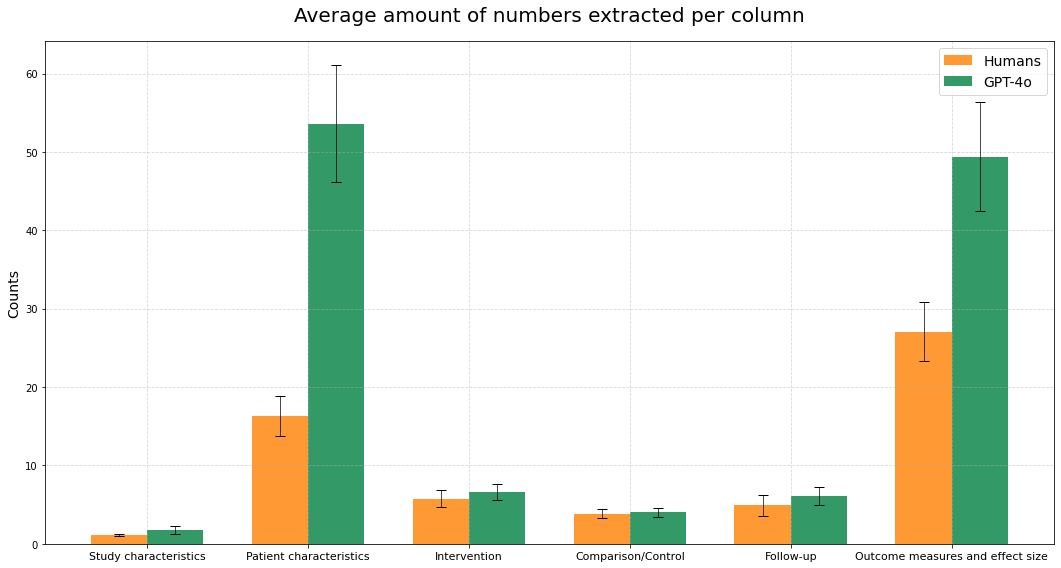

In [281]:
# Setup data for plotting, focusing on columns 2 to 7
human_means = [average_metrics.get(f'average_human_count_{i}', 0) for i in range(2, 8)]
gpt_means = [average_metrics.get(f'average_gpt_count_{i}', 0) for i in range(2, 8)]
human_sems = [average_metrics.get(f'sem_human_count_{i}', 0) for i in range(2, 8)]
gpt_sems = [average_metrics.get(f'sem_gpt_count_{i}', 0) for i in range(2, 8)]

index = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(index - width/2, human_means, width, yerr=human_sems, label='Humans', capsize=5, color='#FF9933', error_kw={'elinewidth': 0.7})
rects2 = ax.bar(index + width/2, gpt_means, width, yerr=gpt_sems, label='GPT-4o', capsize=5, color='#339966', error_kw={'elinewidth': 0.7})

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Average amount of numbers extracted per column', fontsize=20, pad = 20)
ax.set_xticks(index)

# Set specific names for each pair of bars
custom_names = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]
ax.set_xticklabels(custom_names, rotation=0, ha='center', fontsize=11)

ax.legend(fontsize = 14)

# Optional: add grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

### Distribution of results

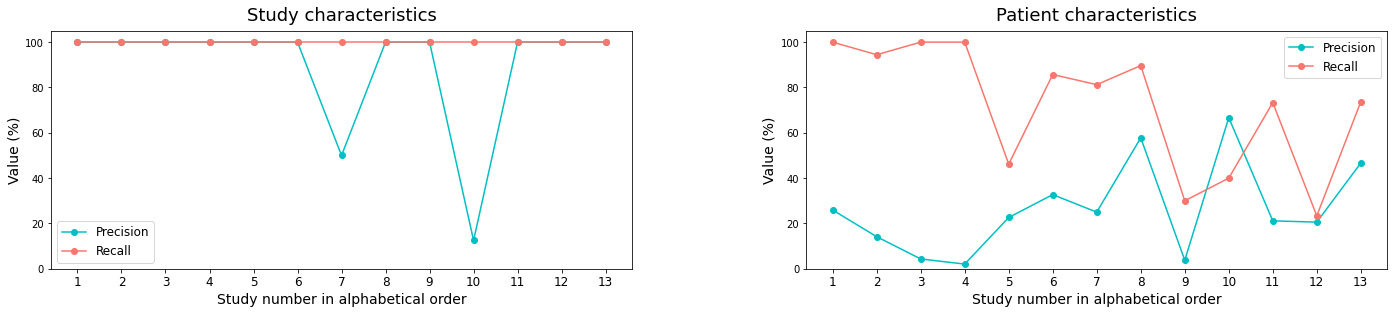

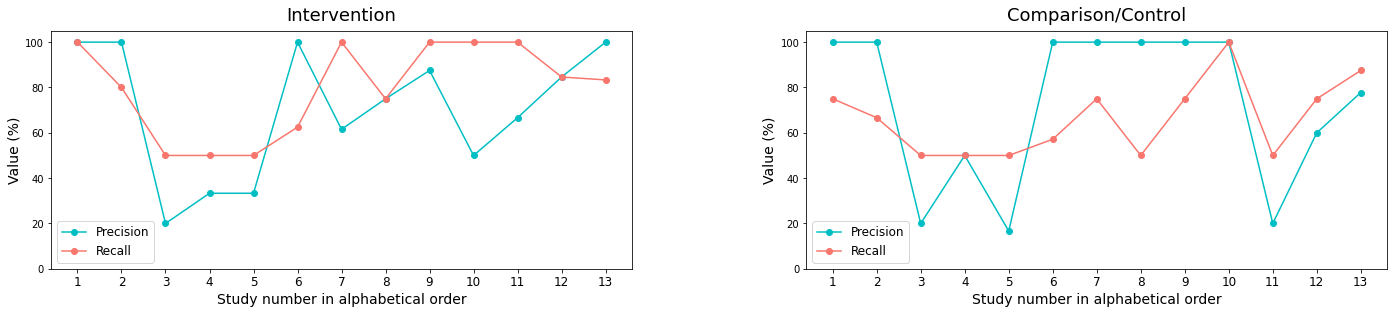

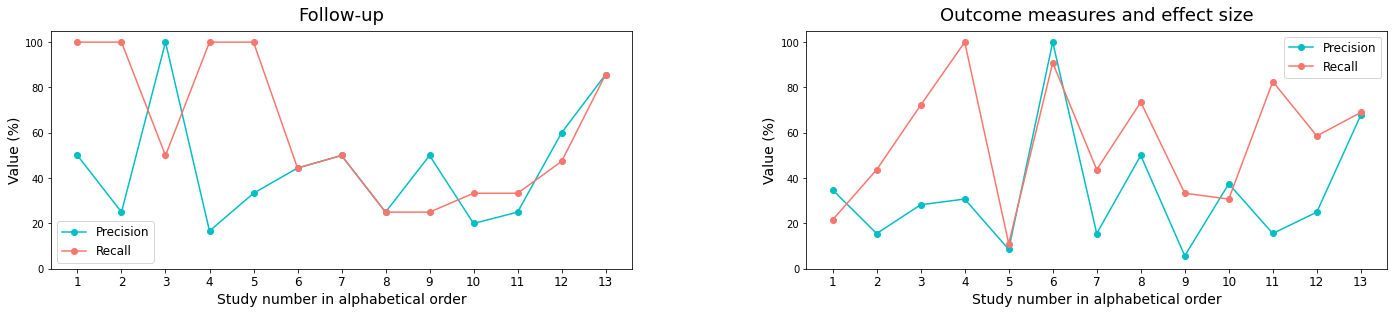

In [300]:
# Define custom titles for each plot reflecting different study characteristics
custom_titles = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]

for fig_num in range(3):  # Loop to create 3 different figures
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # Create a new figure with 1 row and 2 columns
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i in range(2 * fig_num + 2, 2 * fig_num + 4):  # Adjust the range to select the correct columns for each figure
        accuracy_col = f'accuracy_column_{i}'
        recall_col = f'recall_column_{i}'

        ax = axes[i - (2 * fig_num + 2)]  # Select the appropriate subplot axis by adjusting the index

        if accuracy_col in df_numbers.columns and recall_col in df_numbers.columns:
            # Extract data for plotting
            accuracies = df_numbers[accuracy_col]
            recalls = df_numbers[recall_col]

            # Generate indices based on the number of studies
            indices = np.arange(1, len(accuracies) + 1)

            # Plot accuracy and recall with lines connecting the dots
            ax.plot(indices, accuracies, marker='o', linestyle='-', label='Precision', color='#00bfc4')
            ax.plot(indices, recalls, marker='o', linestyle='-', label='Recall', color='#f8766d')

            # Set titles, labels, and add legend
            ax.set_title(custom_titles[i - 2], fontsize=18, pad=10)  # Adjusted font size and padding for clarity
            ax.set_xlabel('Study number in alphabetical order', fontsize=14)  # Adjusted font size for clarity
            ax.set_ylabel('Value (%)', fontsize=14)  # Adjusted font size for clarity
            ax.legend(fontsize=12)

            # Explicitly set x-axis ticks
            ax.set_xticks(indices)  # Set x-ticks to match your indices
            ax.set_xticklabels(indices, fontsize=12)  # Optionally set custom labels if your indices are not straightforward numbers

            # Set the y-axis to range from 0 to 100
            ax.set_ylim(0, 105)

    # Adjust layout for spacing and aesthetics
    plt.tight_layout(pad=3.0)  # Adjust padding to fit the layout neatly
    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the vertical and horizontal space between plots

    # Show the plot
    plt.show()

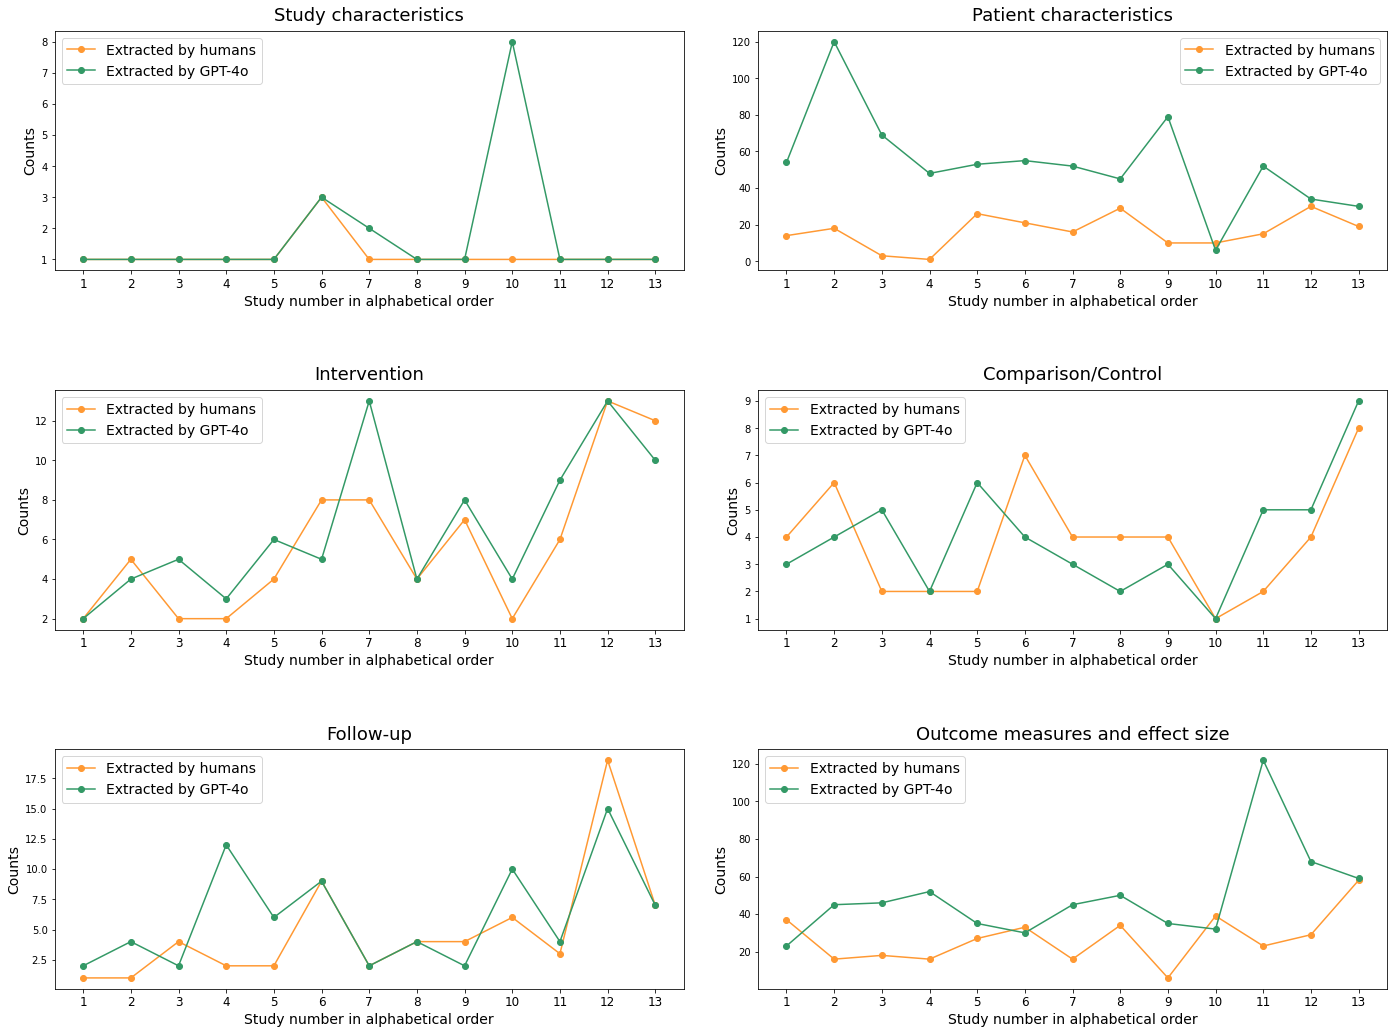

In [301]:
# Prepare the figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Adjusted for 3x2 layout
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier indexing

# Define custom titles for each plot
custom_titles = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]

# Loop through each column index
for i, title in zip(range(2, 8), custom_titles):
    human_count_col = f'human_count_column_{i}'
    gpt_count_col = f'gpt_count_column_{i}'

    ax = axes[i - 2]  # Select the appropriate subplot axis by adjusting the index

    if human_count_col in df_numbers.columns and gpt_count_col in df_numbers.columns:
        # Extract data for plotting
        human_counts = df_numbers[human_count_col]
        gpt_counts = df_numbers[gpt_count_col]

        # Generate indices based on the number of studies
        indices = np.arange(1, len(human_counts) + 1)

        # Plot human and GPT counts with lines connecting the dots
        ax.plot(indices, human_counts, marker='o', linestyle='-', label='Extracted by humans', color='#FF9933')
        ax.plot(indices, gpt_counts, marker='o', linestyle='-', label='Extracted by GPT-4o', color='#339966')
        
        # Set titles, labels, and add legend
        ax.set_title(title, fontsize=18, pad=10)
        ax.set_xlabel('Study number in alphabetical order', fontsize=14)
        ax.set_ylabel('Counts', fontsize=14)
        ax.legend(fontsize = 14)

        # Explicitly set x-axis ticks
        ax.set_xticks(indices)
        ax.set_xticklabels(indices, fontsize=12)

    else:
        print(f"Data missing for column {i}")

# Adjust layout for spacing and aesthetics
plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between plots for clarity

# Show the plot
plt.show()

# Text comparison

In [284]:
# Define the path to your Excel file
text_comparison_file_path = "Papers_and_evidence_tables\Test_dataset\\text_comparison.xlsx"

# Read the Excel file into a DataFrame
df_texts = pd.read_excel(text_comparison_file_path)

# Display the data
print(df_texts)

                    study_name     tfidf_1   jaccard_1    spacy_1     bert_1  \
0            Bashir_2018_table  100.000000  100.000000  90.311581  95.379269   
1           Bremmer_2018_table  100.000000  100.000000  90.402201  95.973766   
2            Djamin_2019_table  100.000000  100.000000  87.663309  92.108238   
3            Djamin_2020_table  100.000000  100.000000  88.056989  91.417497   
4             Faten_2014_table   51.014902   57.142857  90.502687  87.030375   
5   Flores_Gonzalez_2015_table   66.941885   71.428571  94.818943  96.706653   
6              geng_2020_table   81.818021   83.333333  90.585645  91.100329   
7    Jaquet_Pilloud_2019_table   66.941885   71.428571  94.849880  95.096117   
8            Raeisi_2019_table  100.000000  100.000000  90.429261  95.505309   
9             Risom_2020_table  100.000000  100.000000  91.370201  94.942302   
10     Ruangsomboon_2021_table  100.000000  100.000000  90.304799  97.072434   
11         Skjerven_2013_table  100.0000

In [285]:
# Initialize a dictionary to store the average values and SEMs
text_metrics = {}

# Define the similarity metrics
metrics = ['tfidf', 'jaccard', 'spacy', 'bert', 'sbert']
num_columns = 8  # We have metrics from column 1 to 8

# Loop over each metric type and each column index
for metric in metrics:
    for i in range(1, num_columns + 1):
        metric_col = f'{metric}_{i}'  # Construct the column name

        # Check if the column exists in the DataFrame
        if metric_col in df_texts.columns:
            # Calculate the number of non-NA values
            valid_counts = df_texts[metric_col].dropna().size

            # Calculate mean and SEM
            text_metrics[f'average_{metric_col}'] = df_texts[metric_col].mean()
            text_metrics[f'sem_{metric_col}'] = df_texts[metric_col].std() / np.sqrt(valid_counts) if valid_counts > 0 else 0
        else:
            print(f"Column {metric_col} is missing.")

# Convert the dictionary to a DataFrame for better visualization and further use
df_text_metrics = pd.DataFrame([text_metrics])

# Print the extracted averages and SEMs to verify
print(df_text_metrics)

   average_tfidf_1  sem_tfidf_1  average_tfidf_2  sem_tfidf_2  \
0        89.747438     4.769902        61.001427     5.914532   

   average_tfidf_3  sem_tfidf_3  average_tfidf_4  sem_tfidf_4  \
0        41.716706     4.750901        49.069641     6.743026   

   average_tfidf_5  sem_tfidf_5  ...  average_sbert_4  sem_sbert_4  \
0        43.727161     6.030697  ...        77.209338     2.914486   

   average_sbert_5  sem_sbert_5  average_sbert_6  sem_sbert_6  \
0        71.483115     4.448457           68.153     3.574207   

   average_sbert_7  sem_sbert_7  average_sbert_8  sem_sbert_8  
0        63.956187     3.620786        53.397181     3.767781  

[1 rows x 80 columns]


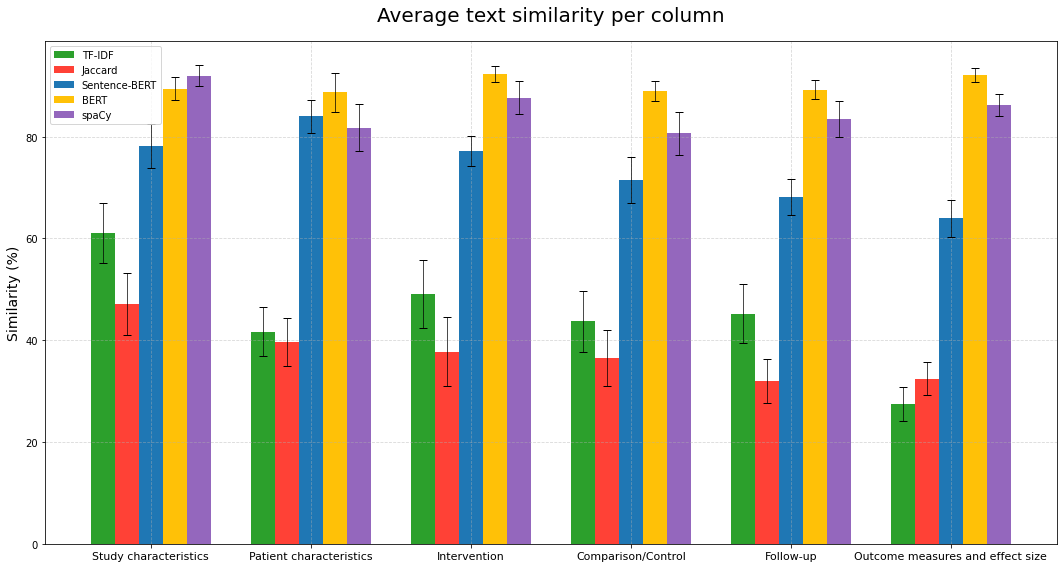

In [290]:
# Define metrics and their corresponding labels for plotting
metrics = ['tfidf', 'jaccard', 'sbert', 'bert', 'spacy']
metric_labels = ['TF-IDF', 'Jaccard', 'Sentence-BERT', 'BERT', 'spaCy']
custom_titles = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]
start_col = 2  # Start column index (inclusive)
end_col = 7    # End column index (inclusive)
num_columns = end_col - start_col + 1
index = np.arange(num_columns)  # Array index for group positions
bar_width = 0.15  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the size as necessary

# Vibrant color palette
colors = ['#2CA02C', '#FF4136', '#1F77B4', '#FFC107', '#9467BD'] 

# Loop through each metric and plot the data for columns 2 to 7
for idx, metric in enumerate(metrics):
    # Extract means and SEMs for columns 2 to 7
    means = [df_text_metrics.get(f'average_{metric}_{i}', 0).values[0] for i in range(start_col, end_col + 1)]
    sems = [df_text_metrics.get(f'sem_{metric}_{i}', 0).values[0] for i in range(start_col, end_col + 1)]
    
    # Plot bars with error bars representing the SEM
    ax.bar(index + idx * bar_width, means, bar_width, label=metric_labels[idx],  # Use metric_labels here
           color=colors[idx], yerr=sems, capsize=4, error_kw={'elinewidth': 0.7, 'ecolor': 'black'})

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Similarity (%)', fontsize=14)
ax.set_title('Average text similarity per column', fontsize=20, pad=20)
ax.set_xticks(index + bar_width * (len(metrics) - 1) / 2)  # Center x-ticks between the groups of bars
ax.set_xticklabels(custom_titles, fontsize=11)

# Place the legend in the top left corner of the plot
ax.legend(loc='upper left')

# Optional: add grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

### Distribution of results

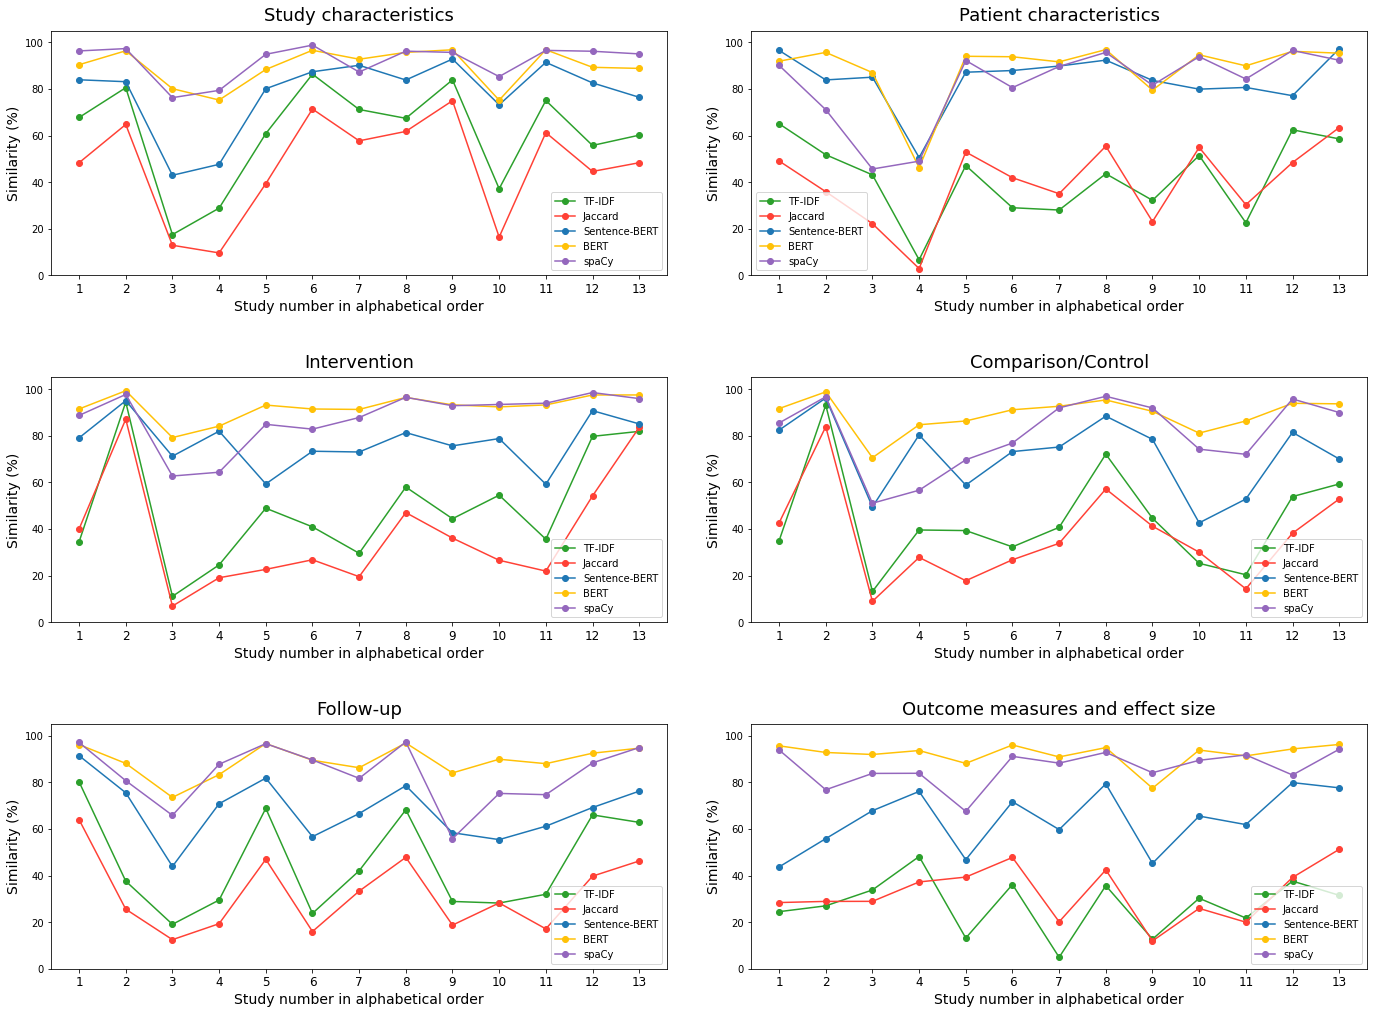

In [287]:
# Define metrics and their corresponding labels for plotting
metrics = ['tfidf', 'jaccard', 'sbert', 'bert', 'spacy']
metric_labels = ['TF-IDF', 'Jaccard', 'Sentence-BERT', 'BERT', 'spaCy']
colors = ['#2CA02C', '#FF4136', '#1F77B4', '#FFC107', '#9467BD']  # Colors for each metric

# Custom titles for each plot reflecting different study characteristics
custom_titles = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]

# Prepare to plot for columns 2 to 7
start_col = 2
end_col = 7
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Adjust for 3x2 layout

# Flattening the axes array for easy indexing
axes = axes.flatten()

for i in range(start_col, end_col + 1):  # Loop through columns 2 to 7
    ax = axes[i - start_col]  # Select the appropriate subplot
    for j, metric in enumerate(metrics):
        metric_col = f'{metric}_{i}'
        if metric_col in df_texts.columns:
            # Extract the data points for this metric and column
            data_points = df_texts[metric_col].dropna()
            x_values = np.arange(1, len(data_points) + 1)  # x-axis from 1 to number of data points (studies)
            
            # Plot data points with lines connecting them
            ax.plot(x_values, data_points, marker='o', linestyle='-', color=colors[j], label=metric_labels[j])
    
    # Set more descriptive titles and enhance readability with font sizes
    ax.set_title(custom_titles[i - start_col], fontsize=18, pad=10)
    ax.set_xlabel('Study number in alphabetical order', fontsize=14)
    ax.set_ylabel('Similarity (%)', fontsize=14)
    ax.legend()

    # Improve the clarity by setting x-ticks to match the x-values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, fontsize=12)

    # Set the y-axis to range from 0 to 100
    ax.set_ylim(0, 105)

# Adjust layout for spacing and aesthetics
plt.tight_layout(pad=4.0)
plt.show()

# ALL TOGETHER

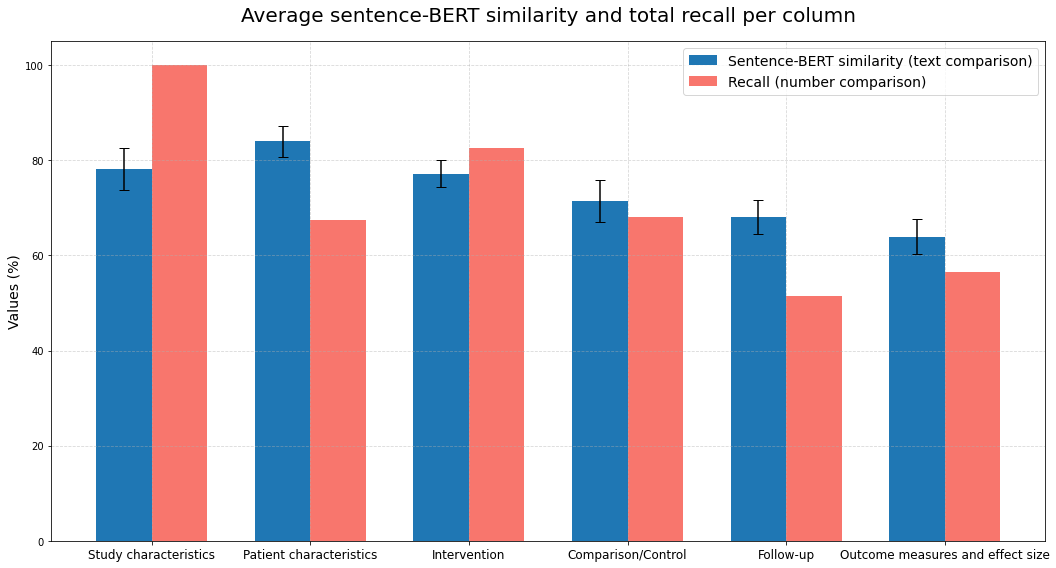

In [295]:
# Define the columns to plot and their more descriptive labels
columns = range(2, 8)  # Columns from 2 to 7
column_labels = [
    'Study characteristics', 
    'Patient characteristics', 
    'Intervention', 
    'Comparison/Control', 
    'Follow-up', 
    'Outcome measures and effect size'
]

# Gather the SBERT average values and their SEMs, and the global recall values
sbert_values = [df_text_metrics[f'average_sbert_{i}'][0] for i in columns]
sbert_sems = [df_text_metrics[f'sem_sbert_{i}'][0] for i in columns]
recall_values = [df_global_metrics[f'global_recall_column_{i}'][0] for i in columns]

# Number of groups
num_groups = len(columns)
index = np.arange(num_groups)
bar_width = 0.35

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 8))  # Larger figure size for better readability
bar1 = ax.bar(index - bar_width/2, sbert_values, bar_width, yerr=sbert_sems, label='Sentence-BERT similarity (text comparison)', color='#1F77B4', capsize=5)
bar2 = ax.bar(index + bar_width/2, recall_values, bar_width, label='Recall (number comparison)', color='#f8766d', capsize=5)

# Add labels, title and custom x-axis tick labels
ax.set_ylabel('Values (%)', fontsize=14)
ax.set_title('Average sentence-BERT similarity and total recall per column', fontsize=20, pad=20)
ax.set_xticks(index)
ax.set_xticklabels(column_labels, fontsize=12, rotation=0, ha="center")  # Added rotation for better label visibility
ax.legend(fontsize=14)

# Optional: add grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout for spacing and aesthetics
plt.tight_layout()
plt.show()

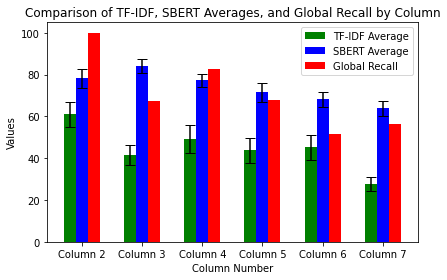

In [289]:
# Define the columns to plot
columns = range(2, 8)  # Columns from 2 to 7

# Gather the TF-IDF average values and their SEMs, SBERT average values and their SEMs, and the global recall values
tfidf_values = [df_text_metrics[f'average_tfidf_{i}'][0] for i in columns]
tfidf_sems = [df_text_metrics[f'sem_tfidf_{i}'][0] for i in columns]
sbert_values = [df_text_metrics[f'average_sbert_{i}'][0] for i in columns]
sbert_sems = [df_text_metrics[f'sem_sbert_{i}'][0] for i in columns]
recall_values = [df_global_metrics[f'global_recall_column_{i}'][0] for i in columns]

# Number of groups
num_groups = len(columns)
index = np.arange(num_groups)
bar_width = 0.2

# Create a bar plot
fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width, tfidf_values, bar_width, yerr=tfidf_sems, label='TF-IDF Average', color='green', capsize=5)
bar2 = ax.bar(index, sbert_values, bar_width, yerr=sbert_sems, label='SBERT Average', color='blue', capsize=5)
bar3 = ax.bar(index + bar_width, recall_values, bar_width, label='Global Recall', color='red', capsize=5)

# Add labels, title and custom x-axis tick labels
ax.set_xlabel('Column Number')
ax.set_ylabel('Values')
ax.set_title('Comparison of TF-IDF, SBERT Averages, and Global Recall by Column')
ax.set_xticks(index)
ax.set_xticklabels([f'Column {i}' for i in columns])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()